In [1]:
%matplotlib inline

In [2]:
import os
import math

import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import calplot

In [3]:
toggl_raw_data_dir = os.path.join('..', 'raw-data', 'toggl')

In [4]:
toggl_raw_data_files = [os.path.join(toggl_raw_data_dir, f) for f in os.listdir(toggl_raw_data_dir)]

In [5]:
def parse_duration(duration_string):
    elements = duration_string.split(':')
    duration = int(elements[0]) + int(elements[1]) / 60 + int(elements[2]) / (60*60)
    return duration

In [6]:
all_dates_business_hours = pd.DataFrame()

for each_toggl_year_file in toggl_raw_data_files:
    df = pd.read_csv(each_toggl_year_file, parse_dates=['Start date'])
    df['duration_h'] = df['Duration'].map(parse_duration)
    duration_each_day = pd.DataFrame(df.groupby(['Start date'])['duration_h'].sum()).reset_index()
    duration_each_day = duration_each_day.rename(columns={'Start date': 'date'})
    all_dates_business_hours = pd.concat([all_dates_business_hours, duration_each_day])

while all_dates_business_hours.duration_h.max() > 24:
    all_dates_business_hours['duration_h'] = all_dates_business_hours['duration_h'].map(lambda x: x - 24 if x > 24 else x)

In [7]:
def plot_my_fun(df):
    fun_by_date_series = pd.Series(df['duration_h'].values, index=df['date'])
    limit_no = 1
    limit_good = 8
    limit_ok = 10
    max_fun_per_day = 30
    color_map = ListedColormap(['#f5f5f5'] * limit_no
                                + ['#99ff66'] * limit_good
                                + ['#f8e447'] * (limit_ok - limit_good)
                                + ['#f3a0bc'] * (max_fun_per_day - limit_good - limit_ok))
    calplot.calplot(fun_by_date_series,
                    textformat='{:.0f}',
                    textcolor='#999999',
                    cmap=color_map,
                    linewidth=0.0005,
                    edgecolor='white'
                   )

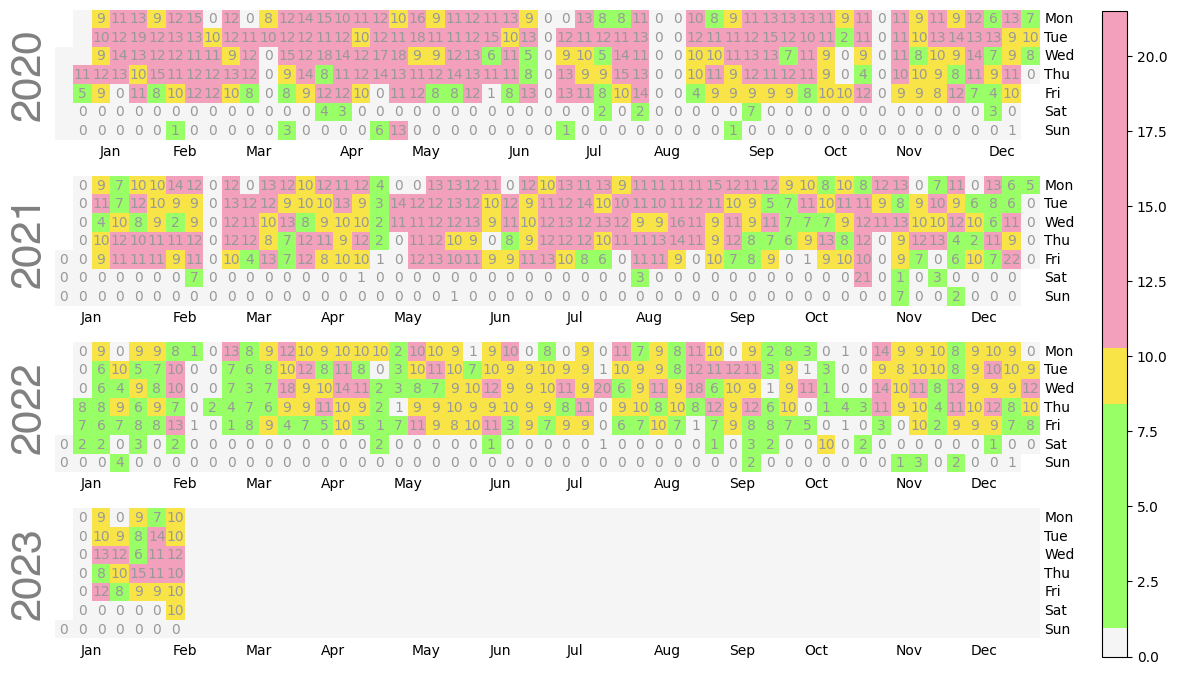

In [8]:
plot_my_fun(all_dates_business_hours)